<a href="https://colab.research.google.com/github/AlexKazmin/SkillFactory-Projects/blob/main/OD_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЦЕЛЬ
Определить коэффициент конверсии сайта в найм работников в разрезе источников трафика. Оценить трафик ботов

# ЗАДАЧИ
Выгрузить данные. Рассчитать коэффициент конверсии с помощью Pandas.
Оценить количество ботов, которые заходят на наш сайт, их долю от всего трафика.
Определить, с каких источников и в какое время суток чаще всего заходят роботы.

# КОНКРЕТНЫЕ ШАГИ 
* Определить параметры запроса к Яндекс.Метрике.
* Выгрузить их по API с помощью Jupyter Notebook.
* Обработать данные в Pandas.
* Посчитать коэффициент конверсии по каналам.
* Рассчитать долю ботов в трафике.
* Определить, с каких источников и в какое время суток чаще всего заходят роботы.


In [97]:
import json 
import requests
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

## Выгружаем и знакомимся с данными

In [98]:
params = {'metrics': 'ym:s:visits,ym:s:goal137595631reaches',
          'dimensions': 'ym:s:lastsignTrafficSource',
          'date1': '2020-09-01',
          'date2': '2020-09-30',
          'ids': 30177909,
          'accuracy':'full',
          'limit':100000}

token = 'AQAAAAAMVJ86AAe25n2YIlWP9kRqstX2Jxzzcjg'
headers = {'Authorization': 'OAuth ' + token}

In [99]:
#Запрос к Яндекс Метрике 
response = requests.get('https://api-metrika.yandex.net/stat/v1/data', params=params, headers=headers)
print (response.status_code) #код ответа, полученный от API

200


In [100]:
#Переводим ответ от API в словарь
metrika_data = response.json()
print(type(metrika_data))

<class 'dict'>


посмотрим, какие ключи есть в словаре metrika_data:

In [101]:
print(metrika_data.keys())

dict_keys(['query', 'data', 'total_rows', 'total_rows_rounded', 'sampled', 'contains_sensitive_data', 'sample_share', 'sample_size', 'sample_space', 'data_lag', 'totals', 'min', 'max'])


Прежде всего нас интересует значение по ключу data. Именно там содержатся данные статистики посещаемости, полученные от API Яндекс.Метрики.


Посмотрим на данные статистики:

In [103]:
pprint(metrika_data['data'][0:5])

[{'dimensions': [{'icon_id': '2',
                  'icon_type': 'traffic-source',
                  'id': 'organic',
                  'name': 'Search engine traffic'}],
  'metrics': [3334.0, 0.0]},
 {'dimensions': [{'icon_id': '0',
                  'icon_type': 'traffic-source',
                  'id': 'direct',
                  'name': 'Direct traffic'}],
  'metrics': [757.0, 0.0]},
 {'dimensions': [{'icon_id': '1',
                  'icon_type': 'traffic-source',
                  'id': 'referral',
                  'name': 'Link traffic'}],
  'metrics': [126.0, 0.0]},
 {'dimensions': [{'icon_id': '8',
                  'icon_type': 'traffic-source',
                  'id': 'social',
                  'name': 'Social network traffic'}],
  'metrics': [80.0, 0.0]},
 {'dimensions': [{'icon_id': '-1',
                  'icon_type': 'traffic-source',
                  'id': 'internal',
                  'name': 'Internal traffic'}],
  'metrics': [10.0, 0.0]}]


Итак, данные представляют собой список словарей.

Каждый словарь содержит два ключа:

**dimensions** — значения группировок, которые заданы в запросе. Представляют собой список словарей. Это обусловлено тем, что для некоторых группировок, помимо самого значения группировки name, присутствуют дополнительные параметры с различной служебной информацией.

**metrics** — значения метрик, которые заданы в запросе. Представляет собой список значений метрик в том порядке, в котором мы указали их в запросе.

## Обработка данных в Pandas

In [104]:
metrika_df = pd.DataFrame(metrika_data['data'])
display(metrika_df.head(10))

,dimensions,metrics
0,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[3334.0, 0.0]"
1,"[{'icon_id': '0', 'icon_type': 'traffic-source...","[757.0, 0.0]"
2,"[{'icon_id': '1', 'icon_type': 'traffic-source...","[126.0, 0.0]"
3,"[{'icon_id': '8', 'icon_type': 'traffic-source...","[80.0, 0.0]"
4,"[{'icon_id': '-1', 'icon_type': 'traffic-sourc...","[10.0, 0.0]"
5,"[{'icon_id': '4', 'icon_type': 'traffic-source...","[6.0, 0.0]"
6,"[{'icon_id': '9', 'icon_type': 'traffic-source...","[2.0, 0.0]"


Видим, что нет данных по конверсии, все значения равны 0. Это связано с тем, что не собираются данные по цели. Если заглянуть в настройки Яндекс.Метрики, видно, что данные по цели начали собирать с 7 октября.

Меняем период в запросе к API и заново выгружаем:

In [105]:
params = {'metrics': 'ym:s:visits,ym:s:goal137595631reaches',
          'dimensions': 'ym:s:lastsignTrafficSource', # атрибуция по последнему значимому источнику. 
          #'dimensions': 'ym:s:lastTrafficSource', # атрибуция по последнему источнику; для задания 47.6.2
          'date1': '2020-10-07',  
          'date2': '2020-10-09',     
          'ids': 30177909,
          'accuracy':'full',
          'limit':100000}
response = requests.get('https://api-metrika.yandex.net/stat/v1/data', params=params, headers=headers)
metrika_data = response.json()
metrika_df = pd.DataFrame(metrika_data['data'])
display(metrika_df.head(10))

,dimensions,metrics
0,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[345.0, 10.0]"
1,"[{'icon_id': '0', 'icon_type': 'traffic-source...","[113.0, 5.0]"
2,"[{'icon_id': '1', 'icon_type': 'traffic-source...","[16.0, 1.0]"
3,"[{'icon_id': '8', 'icon_type': 'traffic-source...","[12.0, 1.0]"
4,"[{'icon_id': '-1', 'icon_type': 'traffic-sourc...","[2.0, 0.0]"


Избавляемся от вложенных словарей

In [183]:
def getMetrikaDataInListOfDicts(metrika_data):
    list_of_dicts = []
    dimensions_list = metrika_data['query']['dimensions']
    metrics_list = metrika_data['query']['metrics']
    for data_item in metrika_data['data']:
        d = {}
        for i,dimension in enumerate(data_item['dimensions']):
            d[dimensions_list[i]] = dimension['name']
        for i,metric in enumerate(data_item['metrics']):
            d[metrics_list[i]] = metric
        list_of_dicts.append(d)
    return list_of_dicts
    
metrika_list_of_dicts = getMetrikaDataInListOfDicts(metrika_data)
pprint(metrika_list_of_dicts[0:10])

[{'ym:s:hour': '16:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 24.70119522,
  'ym:s:visits': 251.0},
 {'ym:s:hour': '15:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 26.25,
  'ym:s:visits': 240.0},
 {'ym:s:hour': '11:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 25.87719298,
  'ym:s:visits': 228.0},
 {'ym:s:hour': '13:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 28.1938326,
  'ym:s:visits': 227.0},
 {'ym:s:hour': '12:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 24.88888889,
  'ym:s:visits': 225.0},
 {'ym:s:hour': '14:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 25.77777778,
  'ym:s:visits': 225.0},
 {'ym:s:hour': '17:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 26.31578947,
  'ym:s:visits': 

Создаём датафрейм

In [107]:
metrika_df = pd.DataFrame(metrika_list_of_dicts)
display(metrika_df.head(10))

,ym:s:lastsignTrafficSource,ym:s:visits,ym:s:goal137595631reaches
0,Search engine traffic,345.0,10.0
1,Direct traffic,113.0,5.0
2,Link traffic,16.0,1.0
3,Social network traffic,12.0,1.0
4,Internal traffic,2.0,0.0


## Анализ данных

Для удобства переименуем столбцы и сразу же добавим новый столбец с расчётом конверсии.

In [108]:
metrika_df.columns=['Source','Visits','Conversions']
metrika_df['Last non-direct CR%'] = metrika_df['Conversions']*100/metrika_df['Visits']
display(metrika_df.head(10))

,Source,Visits,Conversions,Last non-direct CR%
0,Search engine traffic,345.0,10.0,2.898551
1,Direct traffic,113.0,5.0,4.424779
2,Link traffic,16.0,1.0,6.250000
3,Social network traffic,12.0,1.0,8.333333
4,Internal traffic,2.0,0.0,0.000000


Мы получили конверсию источников трафика.
Сделаем визуализацию

Text(0.5, 1.0, 'Конверсия по каналам трафика')

<Figure size 432x288 with 0 Axes>

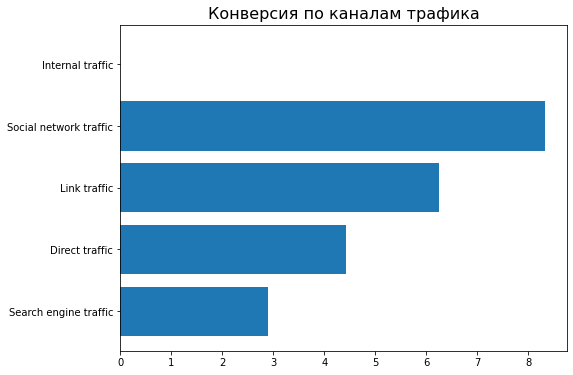

In [181]:
fig = plt.figure()
fig, axes = plt.subplots(1, figsize=(8,6))
plt.barh(y = metrika_df['Source'], width = metrika_df['Last non-direct CR%'])
axes.set_title('Конверсия по каналам трафика', fontsize=16)


## Анализ ботов
Роботами могут быть пауки поисковых систем, которые индексируют контент блога, или же различные парсеры и агрегаторы контента. «Яндекс.Метрика» позволяет находить этих роботов и показывает их в отдельном параметрe ym:s:isRobot, а также считает их долю в специальной метрике ym:s:robotPercentage.

In [187]:
params = {'metrics': 'ym:s:visits,ym:s:robotPercentage',
          'dimensions': 'ym:s:lastsignTrafficSource,ym:s:hour', # атрибуция по последнему значимому источнику. 
          'date1': '2020-09-01',  
          'date2': '2020-09-30',     
          'ids': 30177909,
          'accuracy':'full',
          'limit':100000}
response = requests.get('https://api-metrika.yandex.net/stat/v1/data', params=params, headers=headers)
metrika_data = response.json()
pprint(metrika_data)

{'contains_sensitive_data': False,
 'data': [{'dimensions': [{'icon_id': '2',
                           'icon_type': 'traffic-source',
                           'id': 'organic',
                           'name': 'Search engine traffic'},
                          {'id': '16', 'name': '16:00'}],
           'metrics': [251.0, 24.70119522]},
          {'dimensions': [{'icon_id': '2',
                           'icon_type': 'traffic-source',
                           'id': 'organic',
                           'name': 'Search engine traffic'},
                          {'id': '15', 'name': '15:00'}],
           'metrics': [240.0, 26.25]},
          {'dimensions': [{'icon_id': '2',
                           'icon_type': 'traffic-source',
                           'id': 'organic',
                           'name': 'Search engine traffic'},
                          {'id': '11', 'name': '11:00'}],
           'metrics': [228.0, 25.87719298]},
          {'dimensions': [{'icon_id': '2',
 

Приведем словарь к Датафрейму

In [111]:
bots = pd.DataFrame(metrika_data['data'])
display(bots.head(10))


,dimensions,metrics
0,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[251.0, 24.70119522]"
1,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[240.0, 26.25]"
2,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[228.0, 25.87719298]"
3,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[227.0, 28.1938326]"
4,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[225.0, 24.88888889]"
5,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[225.0, 25.77777778]"
6,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[209.0, 26.31578947]"
7,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[186.0, 19.35483871]"
8,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[166.0, 17.46987952]"
9,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[161.0, 23.60248447]"


Избавляемся от вложенных словарей

In [139]:
metrika_list_of_dicts = getMetrikaDataInListOfDicts(metrika_data)
pprint(metrika_list_of_dicts[0:5])

[{'ym:s:hour': '16:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 24.70119522,
  'ym:s:visits': 251.0},
 {'ym:s:hour': '15:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 26.25,
  'ym:s:visits': 240.0},
 {'ym:s:hour': '11:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 25.87719298,
  'ym:s:visits': 228.0},
 {'ym:s:hour': '13:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 28.1938326,
  'ym:s:visits': 227.0},
 {'ym:s:hour': '12:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 24.88888889,
  'ym:s:visits': 225.0}]


Создаем теперь датафрейм с вытащенными данными.

In [135]:
bots_df = pd.DataFrame(metrika_list_of_dicts)
bots_df.columns=['Source','Time','Visits','Bots percentage']
bots_df['RobotCount'] = (bots_df['Visits']/100)*bots_df['Bots percentage'] # приблизительное число роботов

display(bots_df.head(10))

,Source,Time,Visits,Bots percentage,RobotCount
0,Search engine traffic,16:00,251.0,24.701195,62.0
1,Search engine traffic,15:00,240.0,26.250000,63.0
2,Search engine traffic,11:00,228.0,25.877193,59.0
3,Search engine traffic,13:00,227.0,28.193833,64.0
4,Search engine traffic,12:00,225.0,24.888889,56.0
5,Search engine traffic,14:00,225.0,25.777778,58.0
6,Search engine traffic,17:00,209.0,26.315789,55.0
7,Search engine traffic,10:00,186.0,19.354839,36.0
8,Search engine traffic,21:00,166.0,17.469880,29.0
9,Search engine traffic,19:00,161.0,23.602484,38.0


In [122]:
#Считаем общую долю ботов
a=bots_df.RobotCount.sum()
b=bots_df.Visits.sum()
c=a/b*100
print('На сайт заходят {} ботов, их доля от всего трафика составляет {}%'.format(round(a,0),round(c,2)))

На сайт заходят 962.0 ботов, их доля от всего трафика составляет 22.29%


Определим, с каких источников и в какое время суток чаще всего заходят роботы.

Делаем сводную таблицу, группируя по источнику трафика

In [132]:
pivot_metrika=bots_df.pivot_table(values=['RobotCount','Visits'], index=['Source'], aggfunc='sum',margins=True)
pivot_metrika['%_Robots'] = ((pivot_metrika['RobotCount']*100)/pivot_metrika['Visits']).round(2)
pivot_metrika

,RobotCount,Visits,%_Robots
Source,,,
Cached page traffic,1.0,6.0,16.67
Direct traffic,177.0,757.0,23.38
Internal traffic,3.0,10.0,30.00
Link traffic,31.0,126.0,24.60
Recommendation system traffic,0.0,2.0,0.00
Search engine traffic,739.0,3334.0,22.17
Social network traffic,11.0,80.0,13.75
All,962.0,4315.0,22.29


Лидеры по трафику ботов: трафик с поисковых систем(Search engine), переходы по рекламе(Direct) и прямые ссылки(Link traffic).



Топ-3 канала, по которым на сайт приходят роботы: Search engine traffic, Direct traffic, Link traffic. Search engine traffic содержит 77% всех заходов роботов от суммарных заходов роботов на наш сайт. В среднем по всем каналам 22.3% составляют заходы роботов от всего трафика.

In [179]:
#Определить, с каких источников и в какое время суток чаще всего заходят роботы
pivot_metrika_2=bots_df.pivot_table(values=['RobotCount'],
                                       index=['Time'],
                                       columns=['Source'],
                                       aggfunc='sum',
                                       #margins=True,
                                       #margins_name='Total',
                                       fill_value=0
                                       ).reset_index()
#избавляемся от мульти-индекса
pivot_metrika_2.columns=list(map('_'.join,pivot_metrika_2))
pivot_metrika_2.head(10)

,Time_,RobotCount_Cached page traffic,RobotCount_Direct traffic,RobotCount_Internal traffic,RobotCount_Link traffic,RobotCount_Recommendation system traffic,RobotCount_Search engine traffic,RobotCount_Social network traffic
0,00:00,0,2,0,0,0,17,0
1,01:00,1,4,0,0,0,8,0
2,02:00,0,2,0,0,0,5,0
3,03:00,0,2,0,1,0,3,0
4,04:00,0,3,0,0,0,3,0
5,05:00,0,3,0,0,0,1,0
6,06:00,0,3,0,2,0,3,0
7,07:00,0,5,0,1,0,6,0
8,08:00,0,5,0,1,0,29,1
9,09:00,0,12,1,1,0,36,1


<Figure size 432x288 with 0 Axes>

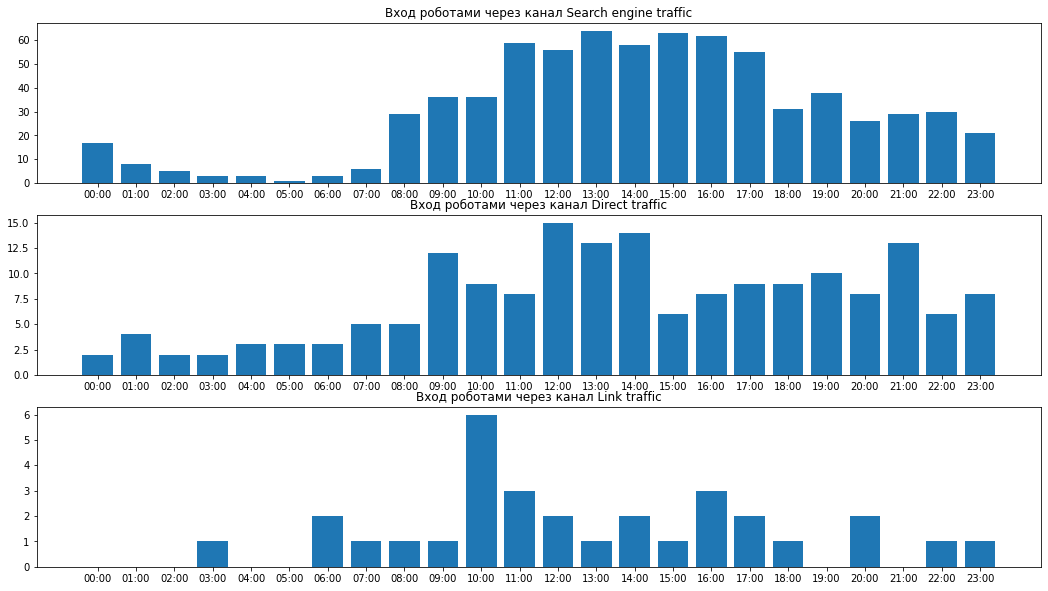

In [182]:
#визуализация
fig = plt.figure()
fig, axes = plt.subplots(3,1, figsize=(18,10))
axes[0].bar(x = pivot_metrika_2['Time_'], height = pivot_metrika_2['RobotCount_Search engine traffic'])
axes[0].set_title('Вход роботами через канал Search engine traffic')
axes[1].bar(x = pivot_metrika_2['Time_'], height = pivot_metrika_2['RobotCount_Direct traffic'])
axes[1].set_title('Вход роботами через канал Direct traffic')
axes[2].bar(x = pivot_metrika_2['Time_'], height = pivot_metrika_2['RobotCount_Link traffic'])
axes[2].set_title('Вход роботами через канал Link traffic')
plt.show()

# Вывод
Как было выяснено на предыдущем этапе, каналы Search engine traffic, Direct traffic, Link traffic являются самыми популярными у роботов, причем в канале Search engine traffic сосредоточено 77% посещений роботов от суммарного посещения роботами через все каналы. Из графиков видно, что роботы чаще всего пользуются каналом Search engine traffic и чаще всего посещают сайт через данный канал с 11:00 до 17:00 (более 50 заходов каждый час). Каналом Direct Traffic роботы пользуются в основном с 12:00 до 14:00, а также в 9:00 и в 21:00, и заходят в эти часы более 10 раз. Через канал Link Traffic роботы в основном входили в 10:00 (6 раз).